In [1]:
import os
os.chdir('../')
os.getcwd()

'C:\\Users\\isvandroffelaa\\Documents\\model\\coarsening\\panchamy'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import numpy as np
import osmnx as ox

sns.set_style("ticks")
# sns.set(font_scale=1.5)

In [3]:
# from main_create_network import city_graph
# from cut_graph_to_boundaries import cut_graph

In [4]:
run_betweenness_centrality = True

In [5]:
if run_betweenness_centrality:
    betweenness_centralities = {}
    for city in ['Amsterdam', 'Utrecht', 'Manhattan', 'Winterswijk', 'Rotterdam']:
        G = ox.load_graphml(f'../data/networks/{city}.graph.graphml')
        # if city != 'Amsterdam':
        #     G = cut_graph(G, city)
        betweenness_centrality = nx.edge_betweenness_centrality(G, k=1000, normalized=True, weight='travel_time')
        with open(f"networks/betweenness_centrality_{city}.pkl", 'wb') as f:
            pickle.dump(betweenness_centrality, f)
        # with open(f"networks/betweenness_centrality_{city}_notnorm.pkl", 'wb') as f:
        #     pickle.dump(betweenness_centrality, f)
        betweenness_centralities[city] = list(betweenness_centrality.values())
else:
    betweenness_centralities = {}
    for city in ['Utrecht', 'Manhattan', 'Winterswijk', 'Rotterdam', 'Amsterdam']:
        with open(f'networks/betweenness_centrality_{city}.pkl', 'rb') as f:
            betweenness_centrality = pickle.load(f)
        # with open(f'networks/betweenness_centrality_{city}_notnorm.pkl', 'rb') as f:
        #     betweenness_centrality = pickle.load(f)
        betweenness_centralities[city] = list(betweenness_centrality.values())

In [7]:
betweenness_centralities_plot = []
for k, v in betweenness_centralities.items():
    betweenness_centralities_plot.extend(v)
    
pal = sns.color_palette()
cmap = pal.as_hex()

betweenness_centralities_colors = []
cities = []
for i, (city, centr) in enumerate(betweenness_centralities.items()):
    for c in centr:
        cities.append(city)
        betweenness_centralities_colors.append(cmap[i])
        
a = pd.DataFrame({'city': cities,
                  'betweenness': betweenness_centralities_plot})

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_20284\1591912010.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e6)


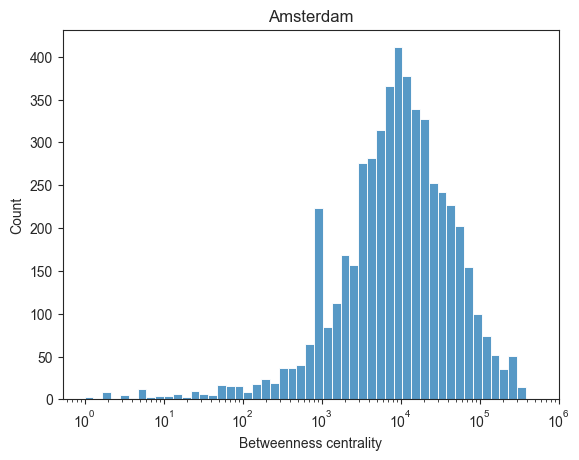

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_20284\1591912010.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e6)


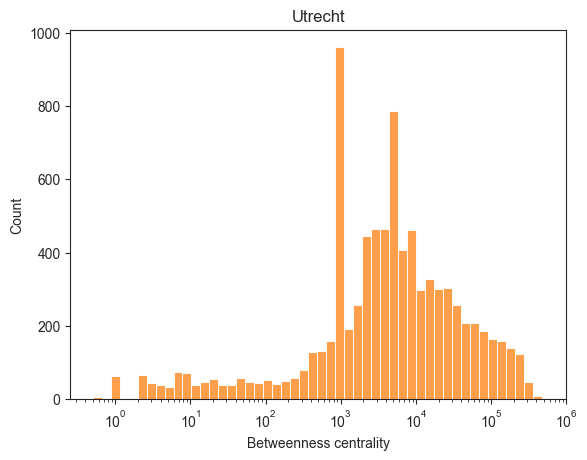

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_20284\1591912010.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e6)


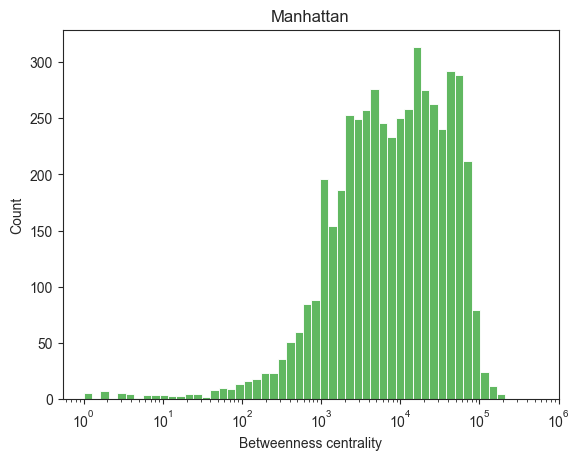

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_20284\1591912010.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e6)


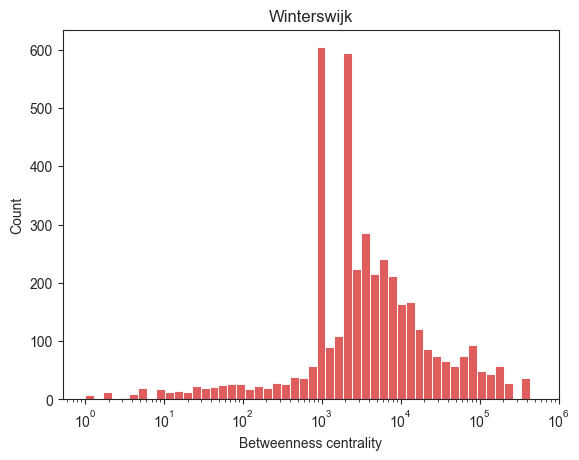

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_20284\1591912010.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e6)


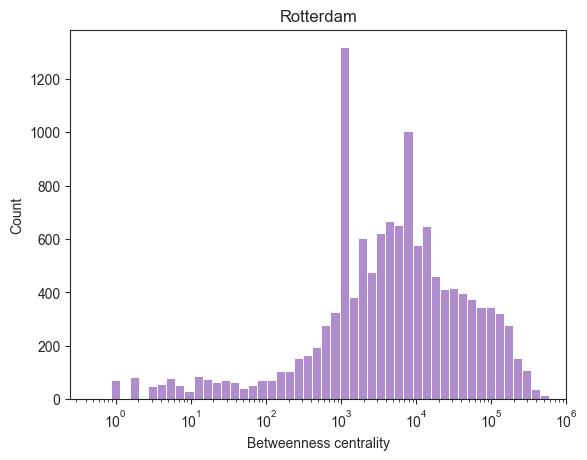

In [8]:
for i, city in enumerate(['Amsterdam', 'Utrecht', 'Manhattan', 'Winterswijk', 'Rotterdam']):
    sns.histplot(x=betweenness_centralities[city], color=cmap[i],log_scale=True, bins=50)
    # plt.xlim(10e-8, 0)
    plt.xlim(0, 1e6)
    plt.xlabel('Betweenness centrality')
    plt.title(city)
    plt.savefig(f'figs/networks/distribution_betweenness_{city}', dpi=300)
    plt.show()

In [9]:
def node_colors(G, escape_nodes, fugitive_start, police_start, nodes_in_highest_percentile_centrality):
    node_size = []
    node_color = []
    for node in G.nodes:
        if node == fugitive_start:
            node_size.append(40)
            node_color.append('tab:orange')
        elif node in police_start:
            node_size.append(40)
            node_color.append('tab:blue')
        elif node in escape_nodes:
            node_size.append(40)
            node_color.append('tab:red')
        elif node in nodes_in_highest_percentile_centrality:
            node_size.append(20)
            node_color.append('silver')
        else:
            node_size.append(0)
            node_color.append('lightgray')
    
    return node_size, node_color

def edge_colors(G):
    edge_color = ['lightgray'] * len(G.edges())
    edge_size = [1] * len(G.edges())
    # for index, edge in enumerate(G.edges()):
    #     if edge in edges_fugitive:
    #         edge_color[index] = 'tab:orange'
    #         edge_size[index] = 2

    return edge_size, edge_color

In [ ]:
betweenness_orig_nodes = {}
for city in ['Winterswijk', 'Utrecht', 'Manhattan', 'Amsterdam', 'Rotterdam']:
    G = ox.load_graphml(f'../data/networks/{city}.graph.graphml')
    with open(f'networks/betweenness_centrality_{city}_notnorm.pkl', 'rb') as f:
        betweenness_centrality = pickle.load(f)
    ct = list(betweenness_centrality.values())
    p = np.percentile(ct, 95)
    
    nodes_in_highest_percentile_centrality = set()
    for (u, v, z), centr in betweenness_centrality.items():
        if centr > p:
            nodes_in_highest_percentile_centrality.add(u)
            nodes_in_highest_percentile_centrality.add(v)
    betweenness_orig_nodes[city] = nodes_in_highest_percentile_centrality
    
    with open(f'networks/escape_nodes_{city}.pkl', 'rb') as f:
        escape_nodes = pickle.load(f)
    with open(f'networks/fugitive_start_{city}.pkl', 'rb') as f:
        fugitive_start = pickle.load(f)
    with open(f'networks/start_police_{city}.pkl', 'rb') as f:
        police_start = pickle.load(f)
    
    node_size, node_color = node_colors(G, escape_nodes, fugitive_start, police_start, nodes_in_highest_percentile_centrality)
    edge_size, edge_color = edge_colors(G)
    # fig = ox.plot_graph(G, 
    #                     bgcolor="white", node_color=node_color, node_size=node_size, 
    #                     edge_linewidth=edge_size, edge_color=edge_color,
    #                     save=True, filepath=f'figs/networks/plot_5%_betweenness_{city}.png', dpi=300)
    # plt.show()

In [25]:
pruning = 1
iterations = 1000
threshold = 1000

for city in ['Winterswijk', 'Utrecht', 'Manhattan', 'Amsterdam', 'Rotterdam']:
    G = ox.load_graphml(filepath=f"networks/coarsened_network_{city}_pruning{pruning}_iter{iterations}_threshold{threshold}.graph.graphml")
    nodes_in_highest_percentile_centrality = betweenness_orig_nodes[city]
    
    nodes_still_in_coarsened = set()
    for node in nodes_in_highest_percentile_centrality:
        if G.has_node(node):
            nodes_still_in_coarsened.add(node)
    
    print(city, len(nodes_still_in_coarsened)/len(nodes_in_highest_percentile_centrality))

Winterswijk 1.0
Utrecht 0.7089201877934272
Manhattan 0.8487972508591065
Amsterdam 0.27816901408450706
Rotterdam 0.6354319180087847


In [20]:
# how many of these top 5% nodes are retained by either algorithm?
calculate_bet = True
pruning = 1
iterations = 1000
threshold = 1000

# for city in ['Winterswijk', 'Utrecht', 'Manhattan', 'Amsterdam', 'Rotterdam']:
for city in ['Winterswijk']:
    G = ox.load_graphml(filepath=f"../networks/coarsened_network_betweenness_{city}_pruning{pruning}_iter{iterations}_threshold{threshold}.graph.graphml")
    # if calculate_bet:
    #     if city != 'Amsterdam':
    #         G = cut_graph(G, city)
    #     betweenness_centrality = nx.edge_betweenness_centrality(G, normalized=False, weight='travel_time')
    #     with open(f"networks/betweenness_centrality_{city}_pruning{pruning}_iter{iterations}_threshold{threshold}.pkl", 'wb') as f:
    #         pickle.dump(betweenness_centrality, f)
    #     betweenness_centralities[city] = list(betweenness_centrality.values())
    # else:
    #     with open(f'networks/betweenness_centrality_{city}_pruning{pruning}_iter{iterations}_threshold{threshold}.pkl', 'rb') as f:
    #         betweenness_centrality = pickle.load(f)
    #     betweenness_centralities[city] = list(betweenness_centrality.values())
      
    nodes_in_highest_percentile_centrality = betweenness_orig_nodes[city]
    with open(f'networks/escape_nodes_{city}.pkl', 'rb') as f:
        escape_nodes = pickle.load(f)
    with open(f'networks/fugitive_start_{city}.pkl', 'rb') as f:
        fugitive_start = pickle.load(f)
    with open(f'networks/start_police_{city}.pkl', 'rb') as f:
        police_start = pickle.load(f)
    
    node_size, node_color = node_colors(G, escape_nodes, fugitive_start, police_start, nodes_in_highest_percentile_centrality)
    edge_size, edge_color = edge_colors(G)
    fig = ox.plot_graph(G, 
                        bgcolor="white", node_color=node_color, node_size=node_size, 
                        edge_linewidth=edge_size, edge_color=edge_color,
                        save=True, filepath=f'figs/networks/plot_5%_betweenness_coarsened_{city}.png', dpi=300)
    plt.show()